# <font color = darkblue> "Rajkumar Choudhary School of data Science and Forecasting."</font>

## <font color = darkred> Twitter tweets analysis.</font>


## Stage 1 :-  Find recent tweets using the keyword and store the raw data in log files.
### Write a program that takes keyword as input and finds recent tweets (100,000 tweets) containing that keyword using twitter’s official API and store the raw data (tweet JSON object) in log files ensuring that the log file should not exceed 10000 records or 5 Mb in size (whichever constraint is met first). You will have multiple log files for the raw data, choose naming convention for these files wisely as they will be reused in Stage 2. You can also use third party library as well (example - Tweepy for python).

# Importing Tweepy and other Libraries.

In [1]:
import tweepy
from tweepy import OAuthHandler
import csv
import pandas as pd
import json
from datetime import datetime
start_time=datetime.now()

## Initializing All the four important API keys for Tweet Analysis.

In [2]:
# all 4 authentication keys to access twitter API
# to connect as OAth handler or jump serever / revers proxy server
consumer_key = "Z91q6yFBkJPUNJp629iYTofN1"
consumer_sec = "wWyAQft8jX9K1DyACL4Iy76ZEOVBLXKZOjGFfdNe4INCUvK4wX"

#consumer_sec = "4rGSGZEVbkxbv3mJgGhYKTfYFLM2quZSodWypy1zYf8JoN6FSU"
# from proxy server we need to connect
access_token = "1522505735115997184-P5EtO25YpRbCndgwxy1E6HlI6FA1v0"
access_token_sec = "ukHvdJYSCrLvN9YprXbNNpk8RDB8BWJs0CJKhHfeuaAIW"

### Define a function to Access the cunsumer key and Consumer Security key.

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_sec)

### By auth.set function Accessing the Access Token and Access Security Token.

In [4]:
auth.set_access_token(access_token,access_token_sec)

### Define API to connect to Strong API server of twitter.

In [5]:
api = tweepy.API(auth)

In [6]:
search_key = input('Please enter keyword or hashtag to search: ')     
no_of_tweet = input('Please enter how many tweets to analyze: ')   

Please enter keyword or hashtag to search: Data Science
Please enter how many tweets to analyze: 100


In [7]:
data = api.search_tweets(search_key,lang='en',count=no_of_tweet)

In [8]:
data[3]

Status(_api=<tweepy.api.API object at 0x000001703F431310>, _json={'created_at': 'Fri May 06 12:18:42 +0000 2022', 'id': 1522551428040036352, 'id_str': '1522551428040036352', 'text': '@Adam_Baumel @PeterGiunta If you actually read the article and not just where it’s from, you’ll see there are links… https://t.co/Jc8ayrNkhy', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Adam_Baumel', 'name': 'Adam Baumel ⚓🗽', 'id': 2171052229, 'id_str': '2171052229', 'indices': [0, 12]}, {'screen_name': 'PeterGiunta', 'name': 'Peter Giunta', 'id': 2172710372, 'id_str': '2172710372', 'indices': [13, 25]}], 'urls': [{'url': 'https://t.co/Jc8ayrNkhy', 'expanded_url': 'https://twitter.com/i/web/status/1522551428040036352', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in

In [9]:
data.to_csv('rawdata.csv')

### To Create first json file.

In [10]:
d =[]
for i in data:
    status = i
    
    json_str = json.dumps(status._json)

    parsed = json.loads(json_str)

    json.dumps(parsed, indent=4, sort_keys=True)
    list = ['created_at','id_str','text','user','place','geo','coordinates','entities','source']
    
    d.append(dict((k, parsed[k]) for k in list))
    
with open('Stage1.json', 'w+') as f:          
    json.dump(d, f, indent=4)
    

## Stage 2 - Process and clean the raw data and save the processed data in log files.
### Process and clean the raw data stored in Stage 1 and store the processed data in new log files ensuring that the log file should not exceed 10000 records or 5 Mb in size (whichever constraint is met first). You will have multiple log files for the processed data, choose naming convention for these files wisely as they will be reused in Stage 3. You will have to create a new JSON object to store only relevant information in log files.



### Sorting the Tweets from last Cell data.

In [11]:
df=pd.read_json("Stage1.json")
df

,created_at,id_str,text,user,place,geo,coordinates,entities,source
0,2022-05-06 12:19:02+00:00,1522551509459812352,"RT @HutchElle: Has any #Canadian official, in ...","{'id': 1222937669535182849, 'id_str': '1222937...",NaN,NaN,NaN,"{'hashtags': [{'text': 'Canadian', 'indices': ...","<a href=""https://mobile.twitter.com"" rel=""nofo..."
1,2022-05-06 12:18:59+00:00,1522551499758485504,RT @AppliedArtsScot: Hear more from #AASChair ...,"{'id': 791924011743797248, 'id_str': '79192401...",NaN,NaN,NaN,"{'hashtags': [{'text': 'AASChair', 'indices': ...","<a href=""http://twitter.com/download/android"" ..."
2,2022-05-06 12:18:43+00:00,1522551429931712512,"Finally, the Bears are hiring some data scienc...","{'id': 813867916810747906, 'id_str': '81386791...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw..."
3,2022-05-06 12:18:42+00:00,1522551428040036352,@Adam_Baumel @PeterGiunta If you actually read...,"{'id': 555316720, 'id_str': '555316720', 'name...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
4,2022-05-06 12:18:29+00:00,1522551370418692096,@FSBuchholzer But 4th dose is not rolled out f...,"{'id': 953395932929908737, 'id_str': '95339593...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo..."
...,...,...,...,...,...,...,...,...,...
95,2022-05-06 12:00:08+00:00,1522546753156878336,RT @Tech_on_Edge: Most tweeted articles today ...,"{'id': 1426441566453862402, 'id_str': '1426441...",NaN,NaN,NaN,"{'hashtags': [{'text': 'DataAnalytics', 'indic...","<a href=""https://help.twitter.com/en/using-twi..."
96,2022-05-06 12:00:08+00:00,1522546753022709760,RT @realgabecoded: data science doesn't have t...,"{'id': 1352643360092278787, 'id_str': '1352643...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://hypefury.com"" rel=""nofollow"">..."
97,2022-05-06 12:00:07+00:00,1522546750107840512,"There are 20,001 machine learning and data sci...","{'id': 18737039, 'id_str': '18737039', 'name':...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://typefully.com/"" rel=""nofollow..."
98,2022-05-06 12:00:07+00:00,1522546749776273408,RT @Tech_on_Edge: Most tweeted articles today ...,"{'id': 1426441566453862402, 'id_str': '1426441...",NaN,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://help.twitter.com/en/using-twi..."


In [12]:
df=df.dropna(axis='columns')
df

,created_at,id_str,text,user,entities,source
0,2022-05-06 12:19:02+00:00,1522551509459812352,"RT @HutchElle: Has any #Canadian official, in ...","{'id': 1222937669535182849, 'id_str': '1222937...","{'hashtags': [{'text': 'Canadian', 'indices': ...","<a href=""https://mobile.twitter.com"" rel=""nofo..."
1,2022-05-06 12:18:59+00:00,1522551499758485504,RT @AppliedArtsScot: Hear more from #AASChair ...,"{'id': 791924011743797248, 'id_str': '79192401...","{'hashtags': [{'text': 'AASChair', 'indices': ...","<a href=""http://twitter.com/download/android"" ..."
2,2022-05-06 12:18:43+00:00,1522551429931712512,"Finally, the Bears are hiring some data scienc...","{'id': 813867916810747906, 'id_str': '81386791...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw..."
3,2022-05-06 12:18:42+00:00,1522551428040036352,@Adam_Baumel @PeterGiunta If you actually read...,"{'id': 555316720, 'id_str': '555316720', 'name...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r..."
4,2022-05-06 12:18:29+00:00,1522551370418692096,@FSBuchholzer But 4th dose is not rolled out f...,"{'id': 953395932929908737, 'id_str': '95339593...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo..."
...,...,...,...,...,...,...
95,2022-05-06 12:00:08+00:00,1522546753156878336,RT @Tech_on_Edge: Most tweeted articles today ...,"{'id': 1426441566453862402, 'id_str': '1426441...","{'hashtags': [{'text': 'DataAnalytics', 'indic...","<a href=""https://help.twitter.com/en/using-twi..."
96,2022-05-06 12:00:08+00:00,1522546753022709760,RT @realgabecoded: data science doesn't have t...,"{'id': 1352643360092278787, 'id_str': '1352643...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://hypefury.com"" rel=""nofollow"">..."
97,2022-05-06 12:00:07+00:00,1522546750107840512,"There are 20,001 machine learning and data sci...","{'id': 18737039, 'id_str': '18737039', 'name':...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://typefully.com/"" rel=""nofollow..."
98,2022-05-06 12:00:07+00:00,1522546749776273408,RT @Tech_on_Edge: Most tweeted articles today ...,"{'id': 1426441566453862402, 'id_str': '1426441...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://help.twitter.com/en/using-twi..."


In [13]:
#only 3 tweets will show here.
DT = []
ID = []
U = []
T = []
P = []
E = []
R = []
for tweet in tweepy.Cursor(api.search_tweets, q=search_key, count=no_of_tweet,lang="en").items(3):
    print(tweet.created_at,tweet.id_str,tweet.user,tweet.text,tweet.source,tweet.entities,tweet.retweet_count)
    DT.append(tweet.created_at)
    ID.append(tweet.id_str)
    U.append(tweet.user)
    T.append(tweet.text)
    P.append(tweet.source)
    E.append(tweet.entities)
    R.append(tweet.retweet_count)


2022-05-06 12:19:02+00:00 1522551509459812352 User(_api=<tweepy.api.API object at 0x000001703F431310>, _json={'id': 1222937669535182849, 'id_str': '1222937669535182849', 'name': 'John Cunnington 🇨🇦 : First do no harm!', 'screen_name': 'JohnCunnington5', 'location': 'Hamilton, ON', 'description': 'Retired McMaster University internist & respirologist.\nMandates = bad medicine. Bodily autonomy is the hill to die on.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 32562, 'friends_count': 2198, 'listed_count': 92, 'created_at': 'Thu Jan 30 17:41:23 +0000 2020', 'favourites_count': 22328, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 20165, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False,

In [14]:
data = pd.DataFrame({'Date and Time':DT, 'User id':ID,'UserName':U,'Tweet':T, 'URL':P,'Hashtags and Mention':E, 'No. of Retweet':R})
data


,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet
0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,"RT @HutchElle: Has any #Canadian official, in ...",Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5
1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,RT @AppliedArtsScot: Hear more from #AASChair ...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1
2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,"Finally, the Bears are hiring some data scienc...",TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


In [15]:
data[("Tweet")]

0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object

In [16]:
data.head()

,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet
0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,"RT @HutchElle: Has any #Canadian official, in ...",Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5
1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,RT @AppliedArtsScot: Hear more from #AASChair ...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1
2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,"Finally, the Bears are hiring some data scienc...",TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Date and Time         3 non-null      datetime64[ns, UTC]
 1   User id               3 non-null      object             
 2   UserName              3 non-null      object             
 3   Tweet                 3 non-null      object             
 4   URL                   3 non-null      object             
 5   Hashtags and Mention  3 non-null      object             
 6   No. of Retweet        3 non-null      int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 296.0+ bytes


In [18]:
data.dtypes

Date and Time           datetime64[ns, UTC]
User id                              object
UserName                             object
Tweet                                object
URL                                  object
Hashtags and Mention                 object
No. of Retweet                        int64
dtype: object

In [19]:
data.notnull()

,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True


In [20]:
data.nunique

<bound method DataFrame.nunique of               Date and Time              User id  \
0 2022-05-06 12:19:02+00:00  1522551509459812352   
1 2022-05-06 12:18:59+00:00  1522551499758485505   
2 2022-05-06 12:18:43+00:00  1522551429931712513   

                                            UserName  \
0  User(_api=<tweepy.api.API object at 0x00000170...   
1  User(_api=<tweepy.api.API object at 0x00000170...   
2  User(_api=<tweepy.api.API object at 0x00000170...   

                                               Tweet                  URL  \
0  RT @HutchElle: Has any #Canadian official, in ...      Twitter Web App   
1  RT @AppliedArtsScot: Hear more from #AASChair ...  Twitter for Android   
2  Finally, the Bears are hiring some data scienc...            TweetDeck   

                                Hashtags and Mention  No. of Retweet  
0  {'hashtags': [{'text': 'Canadian', 'indices': ...               5  
1  {'hashtags': [{'text': 'AASChair', 'indices': ...               1  
2  {'hash

In [21]:
for tweet in data:
      print(data.Tweet)

0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object
0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object
0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object
0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object
0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object
0    RT @HutchElle: Has any #Canadian of

### Remove URL.

In [22]:
import re

def remove_URL(text):
    return re.sub(r"http\S+", "",str(text))

In [23]:
data['Tweet']= data['Tweet'].apply(remove_URL)
data['Tweet']

0    RT @HutchElle: Has any #Canadian official, in ...
1    RT @AppliedArtsScot: Hear more from #AASChair ...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object

### Remove Mention.

In [24]:
def remove_Mention(Tweet):
    return re.sub(r"@\S+", "",str(Tweet))

In [25]:
data['Tweet']= data['Tweet'].apply(remove_Mention)
data['Tweet']

0    RT  Has any #Canadian official, in ANY capacit...
1    RT  Hear more from #AASChair  about her  #weav...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object

### Remove Reserved Word RT and FAV.

In [26]:
def remove_Reserved_Word(Tweet):
    return re.sub(r"RT/FAV", "",str(Tweet))

In [27]:
data['Tweet']= data['Tweet'].apply(remove_Reserved_Word)
data['Tweet']

0    RT  Has any #Canadian official, in ANY capacit...
1    RT  Hear more from #AASChair  about her  #weav...
2    Finally, the Bears are hiring some data scienc...
Name: Tweet, dtype: object

### Remove punctuation and special character.

In [28]:
def remove_punctuation(Tweet):
    new_words = []
    for word in Tweet:
        new_word = re.sub(r"[^\w\s]", "", str(Tweet))
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [29]:
data['Tweet']=data['Tweet'].apply(remove_punctuation)
data['Tweet']

0    [RT  Has any Canadian official in ANY capacity...
1    [RT  Hear more from AASChair  about her  weavi...
2    [Finally the Bears are hiring some data scienc...
Name: Tweet, dtype: object

In [30]:
data.to_json('Stage2.json')

In [31]:
data.to_csv("Final.csv")

## Stage 3 - Perform following tasks on processed data ""Sentimental Analysis.""
#### Use the processed data of the Stage 2 and write program to find solutions to following sub problems.

In [32]:
dt =pd.read_csv('Final.csv')

In [33]:
dt

,Unnamed: 0,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet
0,0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,['RT Has any Canadian official in ANY capacit...,Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5
1,1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,['RT Hear more from AASChair about her weav...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1
2,2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,['Finally the Bears are hiring some data scien...,TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


## Problem A - Generate word cloud
### Find the count of each word in the entire data set of tweet texts and save the result in csv format in descending order of count.

### Creating word cloud on data which is filtered from Twitter by our Specific Key. 

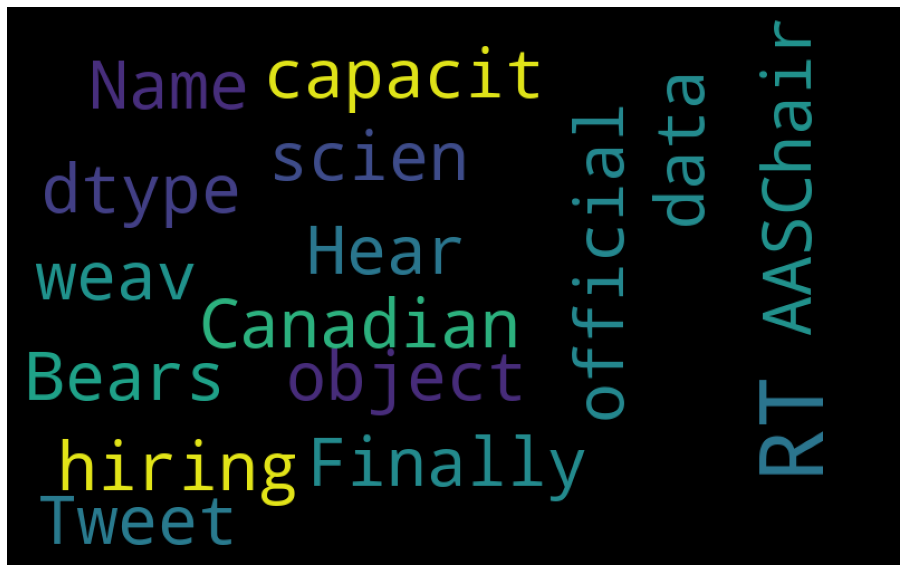

In [34]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
wordcloud = WordCloud( width = 800, height = 500, max_font_size=80, background_color= 'Black', max_words= 5000).generate(str(dt.Tweet))
plt.figure(figsize = (16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Problem B - Create Inverted Index
### Write a program that produces an inverted index that gives, for every hashtag, the list of tweet ids it appears in and save the data in the log file.You will have to create a new JSON object to store only relevant information in the log file. Also enable index search so that a user can search, for a hashtag, the list of tweet ids.

In [35]:
dt.to_json("Stage3.json")

In [36]:
d = pd.read_json("Stage3.json")
d

,Unnamed: 0,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet
0,0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,['RT Has any Canadian official in ANY capacit...,Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5
1,1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,['RT Hear more from AASChair about her weav...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1
2,2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,['Finally the Bears are hiring some data scien...,TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0


In [37]:
d.nunique

<bound method DataFrame.nunique of    Unnamed: 0              Date and Time              User id  \
0           0  2022-05-06 12:19:02+00:00  1522551509459812352   
1           1  2022-05-06 12:18:59+00:00  1522551499758485505   
2           2  2022-05-06 12:18:43+00:00  1522551429931712513   

                                            UserName  \
0  User(_api=<tweepy.api.API object at 0x00000170...   
1  User(_api=<tweepy.api.API object at 0x00000170...   
2  User(_api=<tweepy.api.API object at 0x00000170...   

                                               Tweet                  URL  \
0  ['RT  Has any Canadian official in ANY capacit...      Twitter Web App   
1  ['RT  Hear more from AASChair  about her  weav...  Twitter for Android   
2  ['Finally the Bears are hiring some data scien...            TweetDeck   

                                Hashtags and Mention  No. of Retweet  
0  {'hashtags': [{'text': 'Canadian', 'indices': ...               5  
1  {'hashtags': [{'text': 'A

## Problem C - Perform Sentiment Analysis and publish distribution by place
### Write a program that tells you whether a tweet expresses a positive sentiment, negative sentiment or its neutral and publish the distribution of result by place in csv file.


In [38]:
from textblob import TextBlob
def sentiment(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

def polarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

dt['sentiment']= dt['Tweet'].apply(sentiment)
dt['polarity']= dt['Tweet'].apply(polarity)

dt

,Unnamed: 0,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet,sentiment,polarity
0,0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,['RT Has any Canadian official in ANY capacit...,Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5,0.0,0.0
1,1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,['RT Hear more from AASChair about her weav...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1,0.5,0.5
2,2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,['Finally the Bears are hiring some data scien...,TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,1.0,0.0


In [39]:
def sentiment_analysis(x):
    if x > 0:
        return 'pos'
    elif x < 0:
        return 'neg'
    else:
        return 'ne'
    
dt['sentiment_analysis'] = dt['polarity'].apply(sentiment_analysis)
dt

,Unnamed: 0,Date and Time,User id,UserName,Tweet,URL,Hashtags and Mention,No. of Retweet,sentiment,polarity,sentiment_analysis
0,0,2022-05-06 12:19:02+00:00,1522551509459812352,User(_api=<tweepy.api.API object at 0x00000170...,['RT Has any Canadian official in ANY capacit...,Twitter Web App,"{'hashtags': [{'text': 'Canadian', 'indices': ...",5,0.0,0.0,ne
1,1,2022-05-06 12:18:59+00:00,1522551499758485505,User(_api=<tweepy.api.API object at 0x00000170...,['RT Hear more from AASChair about her weav...,Twitter for Android,"{'hashtags': [{'text': 'AASChair', 'indices': ...",1,0.5,0.5,pos
2,2,2022-05-06 12:18:43+00:00,1522551429931712513,User(_api=<tweepy.api.API object at 0x00000170...,['Finally the Bears are hiring some data scien...,TweetDeck,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,1.0,0.0,ne


## Difference in time taken by programs to run by use of Parallel Processing.

In [40]:
end_time=datetime.now()
print('Duration: {}'.format(end_time-start_time))

Duration: 0:00:16.832612


### Thankyou....